In [12]:
import numpy as np
import pandas as pd
from scipy.linalg import hankel

from embedding import create_embedding
from svd import find_eig
from projection import project_onto_signal_subspace
from threshold import find_threshold
from plot import plot_stuff

In [2]:
xmeas = np.asarray(pd.read_csv('../Dataset/TE/1-Scenario DA1/xmv10_359_data_1.csv', usecols=[14], header=None))

In [3]:
print(xmeas)
print(xmeas.shape)

[[50.095]
 [48.633]
 [50.497]
 ...
 [64.971]
 [62.78 ]
 [63.63 ]]
(4801, 1)


In [4]:
X_train_data = xmeas[:500]
X_theta = xmeas[250:4000]
X_test = xmeas[3750:]

In [5]:
X_train, L = create_embedding(X_train_data)

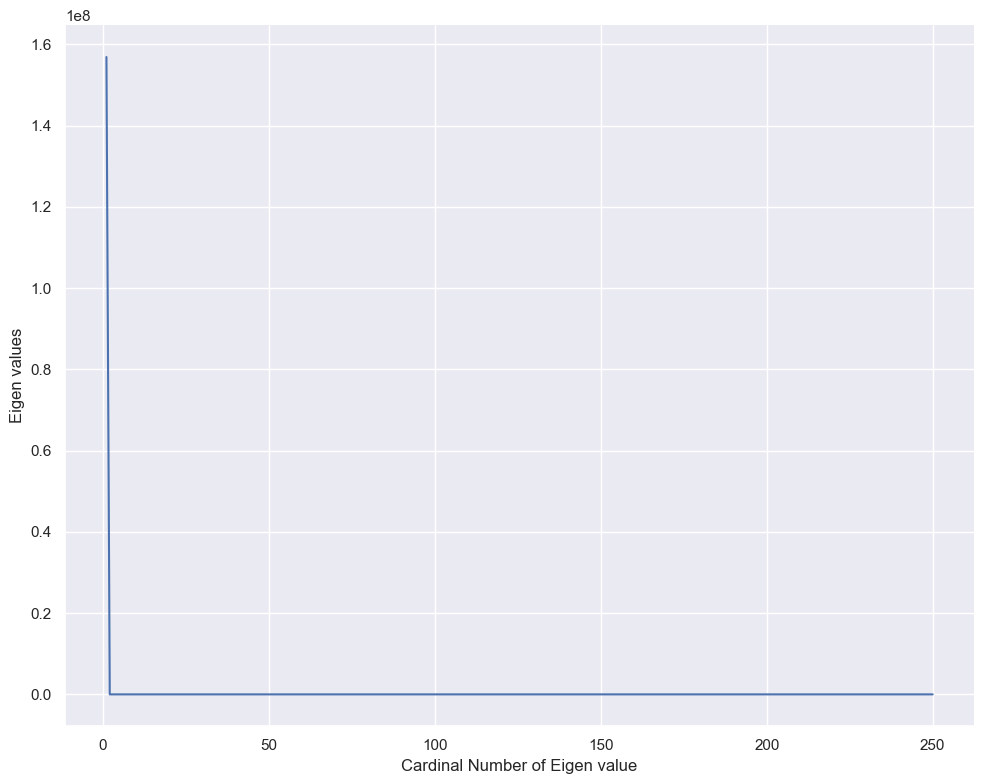

In [6]:
eigenValues, eigenVectors = find_eig(X_train)

In [7]:
centroid, pX, U, X_train_extracted_data = project_onto_signal_subspace(X_train, eigenVectors)

In [8]:
dtest_theta, dtrain_scores, dtest_scores = find_threshold(X_train_data, X_theta, U, centroid, L)

In [9]:
print(dtest_theta)

7.085684274169807


In [10]:
Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul(UT, Xj)
dj_matrix = centroid - pXj
dj_scores = np.linalg.norm(dj_matrix, axis=0, ord=2)
dj_scores = np.asarray(dj_scores)
np.max(dj_scores)

np.float64(71.81464482846627)

(2, 2) (2, 2) (1, 1)


c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(xlables)
c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(xlables)


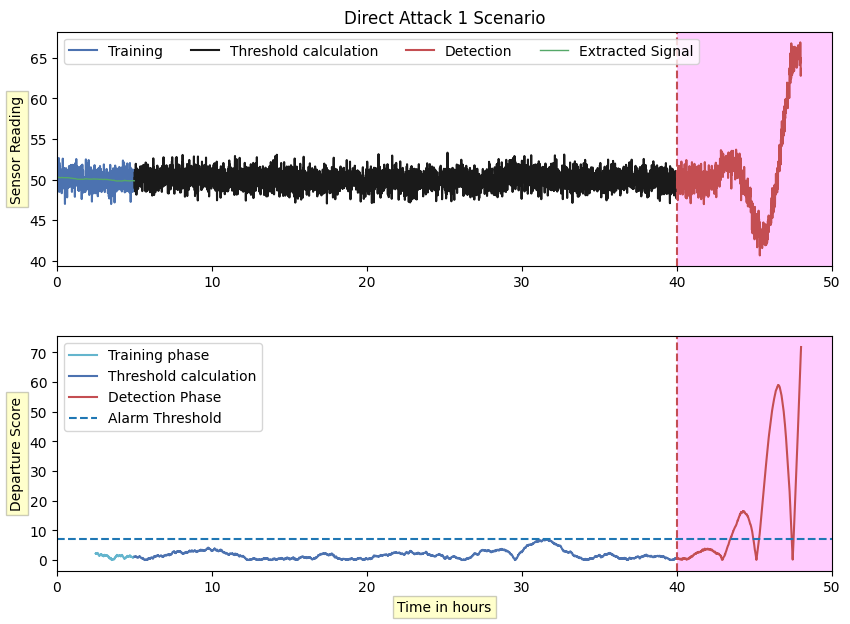

In [11]:
plot_stuff(xmeas, X_train_extracted_data, dtrain_scores, dtest_scores, dj_scores, dtest_theta, L)